<a href="https://colab.research.google.com/github/yashhrj/ippr-/blob/main/ippr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

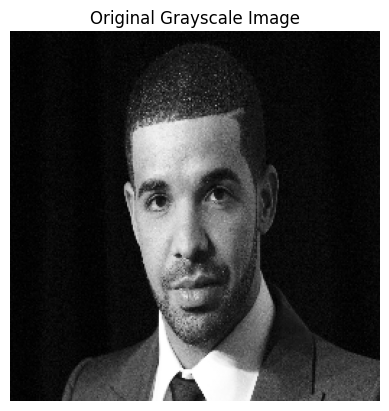

In [ ]:
img = cv2.imread("/content/drake.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')


In [ ]:
kernel_sizes = [3, 9, 15, 21]
filtered_images = []

for k in kernel_sizes:
    kernel = np.ones((k, k), np.float32) / (k * k)
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_images.append(filtered)


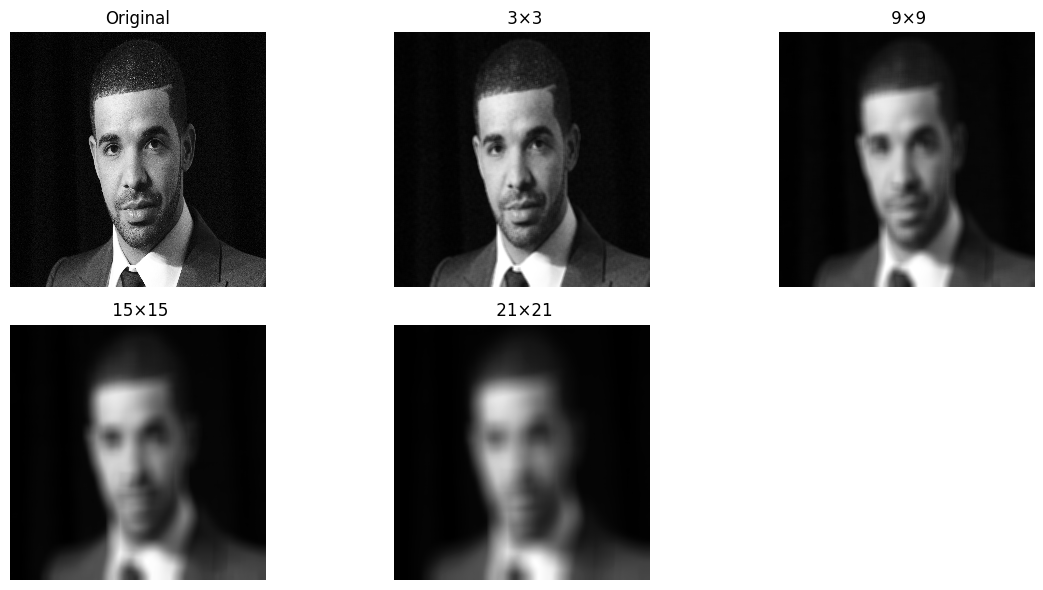

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, k in enumerate(kernel_sizes):
    plt.subplot(2,3,i+2)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f" {k}×{k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Gaussian Noise


In [ ]:
def add_gaussian_noise(image, mean=0, sigma=10):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy = image + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

gaussian_img = add_gaussian_noise(img)


In [ ]:
def add_salt_pepper_noise(image, prob=0.03):
    noisy = image.copy()
    rand = np.random.rand(*image.shape)
    noisy[rand < prob/2] = 0
    noisy[rand > 1 - prob/2] = 255
    return noisy

sp_img = add_salt_pepper_noise(img)


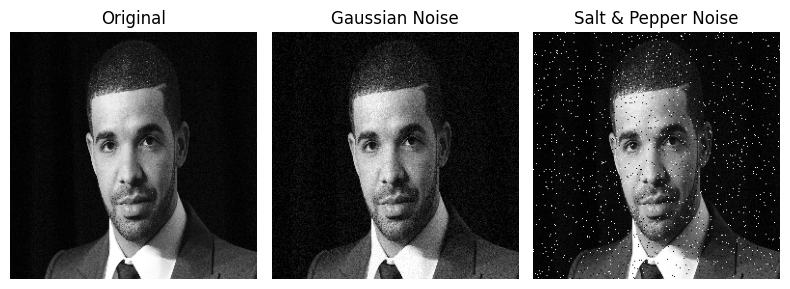

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_img, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sp_img, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
gauss_avg = cv2.filter2D(gaussian_img, -1, avg_mask)
gauss_wt = cv2.filter2D(gaussian_img, -1, wt_mask)
gauss_med = cv2.medianBlur(gaussian_img, 3)


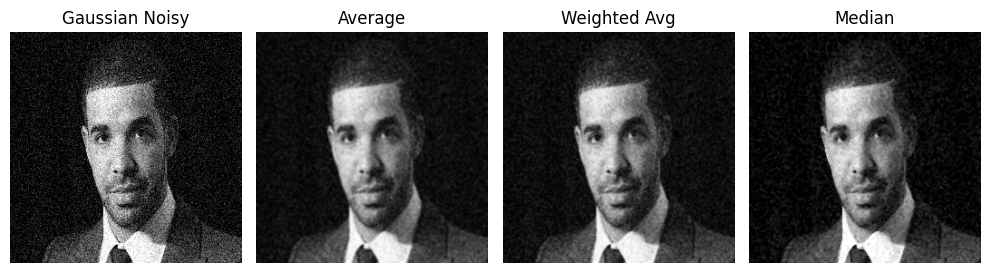

In [ ]:
plt.figure(figsize=(10,4))
images = [gaussian_img, gauss_avg, gauss_wt, gauss_med]
titles = ["Gaussian Noisy", "Average", "Weighted Avg", "Median"]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
sp_avg = cv2.filter2D(sp_img, -1, avg_mask)
sp_wt = cv2.filter2D(sp_img, -1, wt_mask)
sp_med = cv2.medianBlur(sp_img, 3)


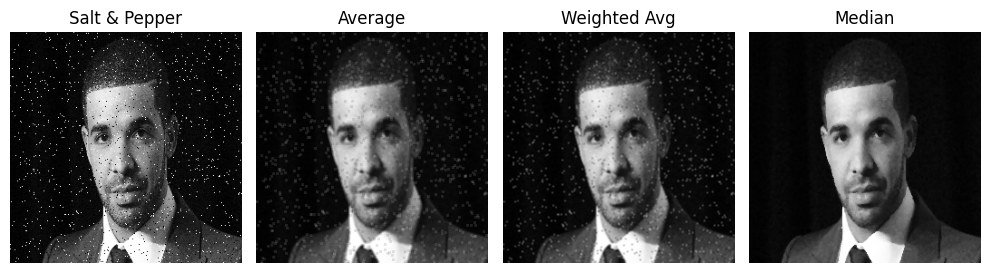

In [ ]:
plt.figure(figsize=(10,4))
images = [sp_img, sp_avg, sp_wt, sp_med]
titles = ["Salt & Pepper", "Average", "Weighted Avg", "Median"]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def mse(original, filtered):
    return np.mean((original - filtered) ** 2)


In [ ]:
mse_gauss_avg = mse(img, gauss_avg)
mse_gauss_wt  = mse(img, gauss_wt)
mse_gauss_med = mse(img, gauss_med)

print("Gaussian Noise MSE Values:")
print("Average Filter       :", mse_gauss_avg)
print("Weighted Avg Filter  :", mse_gauss_wt)
print("Median Filter        :", mse_gauss_med)


Gaussian Noise MSE Values:
Average Filter       : 66.75732421875
Weighted Avg Filter  : 65.54714965820312
Median Filter        : 60.8492431640625


In [ ]:
mse_sp_avg = mse(img, sp_avg)
mse_sp_wt  = mse(img, sp_wt)
mse_sp_med = mse(img, sp_med)

print("\nSalt & Pepper Noise MSE Values:")
print("Average Filter       :", mse_sp_avg)
print("Weighted Avg Filter  :", mse_sp_wt)
print("Median Filter        :", mse_sp_med)



Salt & Pepper Noise MSE Values:
Average Filter       : 40.573822021484375
Weighted Avg Filter  : 35.29240417480469
Median Filter        : 26.201492309570312


In [ ]:
gaussian_results = {
    "Average Filter": mse_gauss_avg,
    "Weighted Average Filter": mse_gauss_wt,
    "Median Filter": mse_gauss_med
}

best_gaussian = min(gaussian_results, key=gaussian_results.get)


In [ ]:
sp_results = {
    "Average Filter": mse_sp_avg,
    "Weighted Average Filter": mse_sp_wt,
    "Median Filter": mse_sp_med
}

best_sp = min(sp_results, key=sp_results.get)


In [ ]:
sp_results = {
    "Average Filter": mse_sp_avg,
    "Weighted Average Filter": mse_sp_wt,
    "Median Filter": mse_sp_med
}

best_sp = min(sp_results, key=sp_results.get)


In [ ]:
print("\n===== FINAL CONCLUSION =====")
print("Best filter for Gaussian Noise      :", best_gaussian)
print("Best filter for Salt & Pepper Noise :", best_sp)



===== FINAL CONCLUSION =====
Best filter for Gaussian Noise      : Median Filter
Best filter for Salt & Pepper Noise : Median Filter
